<a href="https://colab.research.google.com/github/HussainAhmed202/AI-CEP/blob/main/working_with_biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with BioPython
Biopython is a set of libraries to provide the ability to deal with “things” of interest to biologists working on the computer.

In [ ]:
# install module
!pip install biopython

## Working with sequences

* Sequence object is immutable.

* The Seq object provides a number of string like methods (such as count, find, split and strip).

* The Seq object also provides some biological methods, such as complement, reverse_complement, transcribe, back_transcribe and translate (which are not applicable to protein sequences)

In [ ]:
from Bio.Seq import Seq

my_seq = Seq("AGTACACTGGT")
my_seq

Seq('AGTACACTGGT')

In [ ]:
type(my_seq)

Bio.Seq.Seq

In [ ]:
# complementary strand
my_seq.complement()

Seq('TCATGTGACCA')

In [ ]:
# transcribed RNA strand
my_seq.transcribe()

Seq('AGUACACUGGU')

In [ ]:
# transcribed RNA of complmentary strand
my_seq.reverse_complement_rna()

Seq('ACCAGUGUACU')

In [ ]:
# reverse complement strand
my_seq.reverse_complement()

Seq('ACCAGTGTACT')

## Sequencing genome of Lady Slippers
**Cypripedioideae** is a subfamily of orchids commonly known as lady's slipper orchids, lady slipper orchids or slipper orchids. Cypripedioideae includes the genera ***Cypripedium, Mexipedium, Paphiopedilum, Phragmipedium and Selenipedium***


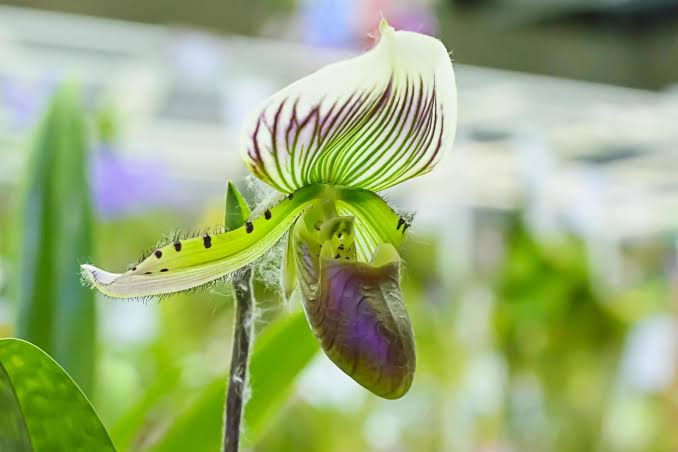

* Extract sequence data from GenBank in Chapter **Accessing NCBI’s Entrez** databases
* Extract data from Swiss-Prot from certain orchid proteins in Chapter **Swiss-Prot and ExPASy**
* Work with ClustalW multiple sequence alignments of orchid proteins in Section **ClustalW**.

### Accessing NCBI’s Entrez

Get data directly from databases instead of downloading manually

The Bio.Entrez module makes use of the Entrez Programming Utilities (also known as EUtils), consisting of eight tools that are described in detail on NCBI’s page at https://www.ncbi.nlm.nih.gov/books/NBK25501/. Each of these tools corresponds to one Python function in the Bio.Entrez module


In [ ]:
from Bio import Entrez

# Biological name for the lady slipper shown above is Cypripedium. There are many sub-species of Cypripedium aswell

# specify the email address
Entrez.email = "james.moore.wayne@example-pet-store.com"

# Search all records related to Cypripedium in the nucleotide db
records =  Entrez.esearch(db="nucleotide", term="Cypripedium[Organism]+complete+genome", idtype="acc")

# Read the returned search results
records = Entrez.read(records)

In [ ]:
records

{'Count': '62', 'RetMax': '20', 'RetStart': '0', 'IdList': ['PQ619134.1', 'PP811674.1', 'PP811673.1', 'PP811672.1', 'PP811671.1', 'PP811670.1', 'PP811669.1', 'PP811668.1', 'PP811667.1', 'PP811666.1', 'PP811665.1', 'PP811664.1', 'PP811663.1', 'OR698943.1', 'OR698942.1', 'OR698941.1', 'OR698940.1', 'OR698939.1', 'OR698938.1', 'OR698937.1'], 'TranslationSet': [{'From': 'Cypripedium[Organism]', 'To': '"Cypripedium"[Organism]'}], 'TranslationStack': [{'Term': '"Cypripedium"[Organism]', 'Field': 'Organism', 'Count': '1', 'Explode': 'Y'}, {'Term': '+complete+genome[All Fields]', 'Field': 'All Fields', 'Count': '1', 'Explode': 'N'}, 'AND'], 'QueryTranslation': '"Cypripedium"[Organism] AND +complete+genome[All Fields]'}

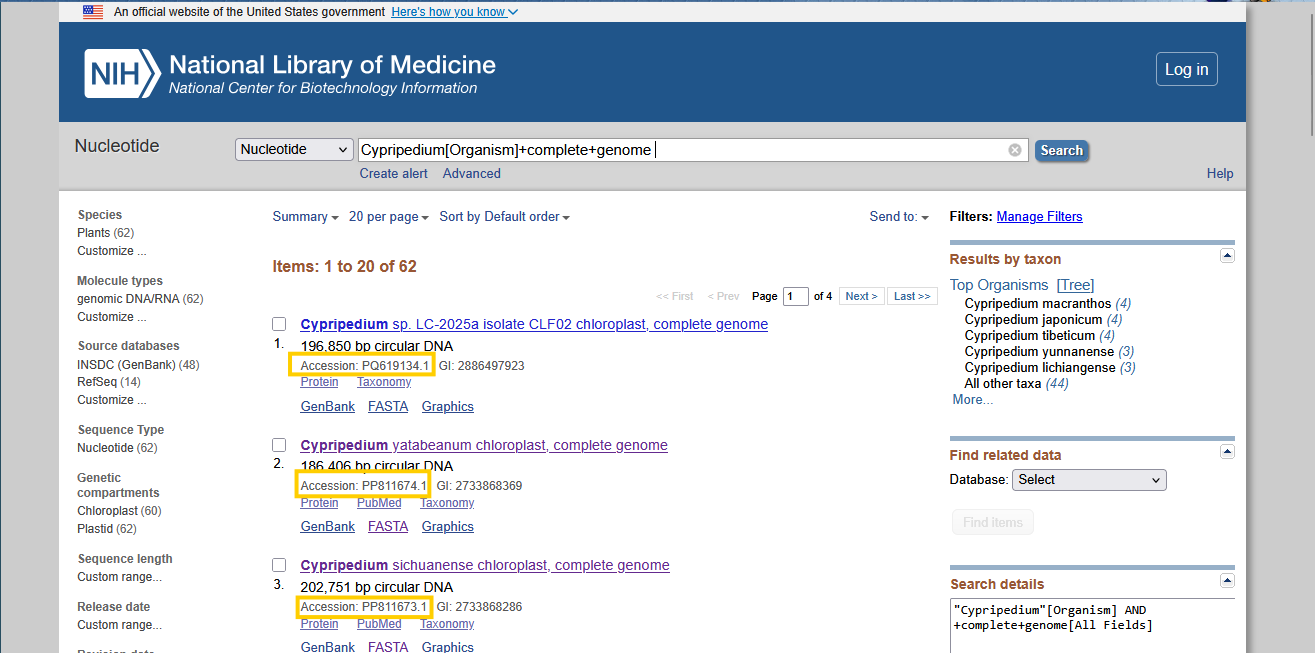

In [ ]:
# Get the Summary of each record
for record_ID in records['IdList']:
  handle = Entrez.esummary(db="nucleotide", id=record_ID)
  print(Entrez.read(handle))
  handle.close()

[{'Item': [], 'Id': '2886497923', 'Caption': 'PQ619134', 'Title': 'Cypripedium sp. LC-2025a isolate CLF02 chloroplast, complete genome', 'Extra': 'gi|2886497923|gb|PQ619134.1|[2886497923]', 'Gi': IntegerElement(2886497923, attributes={}), 'CreateDate': '2025/01/18', 'UpdateDate': '2025/01/18', 'Flags': IntegerElement(256, attributes={}), 'TaxId': IntegerElement(3391705, attributes={}), 'Length': IntegerElement(196850, attributes={}), 'Status': 'live', 'ReplacedBy': '', 'Comment': '  ', 'AccessionVersion': 'PQ619134.1'}]
[{'Item': [], 'Id': '2733868369', 'Caption': 'PP811674', 'Title': 'Cypripedium yatabeanum chloroplast, complete genome', 'Extra': 'gi|2733868369|gb|PP811674.1|[2733868369]', 'Gi': IntegerElement(2733868369, attributes={}), 'CreateDate': '2024/11/27', 'UpdateDate': '2024/11/27', 'Flags': IntegerElement(256, attributes={}), 'TaxId': IntegerElement(53053, attributes={}), 'Length': IntegerElement(186406, attributes={}), 'Status': 'live', 'ReplacedBy': '', 'Comment': '  ', '

In [ ]:
from Bio import SeqIO
from io import StringIO


# Get the sequence for Cypripedium sichuanense chloroplast and Cypripedium yatabeanum chloroplast

stream = Entrez.efetch(db="nucleotide", id="PP811673", rettype="fasta", retmode="text")
fasta_string = stream.read() # string
print(type(fasta_string))
# Parse the FASTA strings into SeqRecord objects
sichuanense_fasta = SeqIO.read(StringIO(fasta_string), "fasta")
print(sichuanense_fasta)

stream.close()

stream = Entrez.efetch(db="nucleotide", id="PP811674", rettype="fasta", retmode="text")
fasta_string = stream.read() # string
print(type(fasta_string))
# Parse the FASTA strings into SeqRecord objects
yatabeanum_fasta = SeqIO.read(StringIO(fasta_string), "fasta")
print(yatabeanum_fasta)
stream.close()

<class 'str'>
ID: PP811673.1
Name: PP811673.1
Description: PP811673.1 Cypripedium sichuanense chloroplast, complete genome
Number of features: 0
Seq('GAACCCCCCATATCTTGTATCTTGTAAGATATGGGGGGATTGCTACCTTCAAAA...TCA')
<class 'str'>
ID: PP811674.1
Name: PP811674.1
Description: PP811674.1 Cypripedium yatabeanum chloroplast, complete genome
Number of features: 0
Seq('AAGGTAGCAATCCCCCCATATCTTACAAGATATGGGGGGATTGCTACCTTCAAA...ACT')


In [ ]:
# Extract sequences
seq1 = str(sichuanense_fasta.seq)
seq2 = str(yatabeanum_fasta.seq)

print(f"Size of the Sichuanense Fasta sequence is: {len(seq1) / 1000} kbp")
print(f"Size of the Yatabeanum Fasta sequence is: {len(seq2) / 1000} kbp")


Size of the Sichuanense Fasta sequence is: 202.751 kbp
Size of the Yatabeanum Fasta sequence is: 186.406 kbp


In [ ]:
from Bio.Align import PairwiseAligner

# By default, the alignment mode is global and match_score = 1
aligner = PairwiseAligner()
print(aligner)

# It will pick the best algorithm based on the hyperparameter values provided
print(aligner.algorithm)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

Needleman-Wunsch


In [ ]:
# provide scoring scheme

aligner.match_score = 1.0
aligner.mismatch_score = -1.0
aligner.gap_score = -2

print(aligner)


Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: -1.000000
  target_internal_open_gap_score: -2.000000
  target_internal_extend_gap_score: -2.000000
  target_left_open_gap_score: -2.000000
  target_left_extend_gap_score: -2.000000
  target_right_open_gap_score: -2.000000
  target_right_extend_gap_score: -2.000000
  query_internal_open_gap_score: -2.000000
  query_internal_extend_gap_score: -2.000000
  query_left_open_gap_score: -2.000000
  query_left_extend_gap_score: -2.000000
  query_right_open_gap_score: -2.000000
  query_right_extend_gap_score: -2.000000
  mode: global



In [ ]:
# globally align the two subsequences of the genomes
alignments = aligner.align(seq1[:200], seq2[:200])

In [ ]:
print("Total number of alignments:", len(alignments))

Total number of alignments: 22919869959


In [ ]:
print(alignments[0])

target            0 GAACCCCCCATATCTTG-TATCTTGTAAGATATGGGGGGATTGCTACCTTCAAAAATTCA
                  0 .|.....|.||..|...-||||||..||||||||||||||||||||||||||||||||||
query             0 AAGGTAGCAATCCCCCCATATCTTACAAGATATGGGGGGATTGCTACCTTCAAAAATTCA

target           59 TATCATATACATATAAATTACATATAAATTTCTACATTTTATACATTAAAGTATTATCCA
                 60 |||-|----|||||||||.---||||-----|-|-|----|-|-------||||||||||
query            60 TAT-A----CATATAAATG---TATA-----C-A-A----A-A-------GTATTATCCA

target          119 TTTGTAGATGGAGCTTCTACAGAAGCTAGATCTAGAGGGAAGTTGTGAGCATTACGTTCA
                120 ||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||
query            93 TTTGTAGATGGAGCTTCTACGGAAGCTAGATCTAGAGGGAAGTTGTGAGCATTACGTTCA

target          179 TGCATTACTTCCATACCAAGA-------------------------- 200
                180 |||||||||||||||||||||-------------------------- 227
query           153 TGCATTACTTCCATACCAAGATTCGCGCGATTTATGATATCAGCCCA 200



In [ ]:
alignments[0].score

33.0